In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
!echo $CUDA_VISIBLE_DEVICES

0


In [2]:
!git checkout craft-update 

M	craft_manywell_train-Copy1.ipynb
Already on 'craft-update'
Your branch is up to date with 'origin/craft-update'.


In [3]:
from annealed_flow_transport.train import run_experiment
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from annealed_flow_transport.many_well_plotting import plot, plot_marginal_pair
from annealed_flow_transport.densities import ManyWell
from annealed_flow_transport.resampling import log_effective_sample_size

import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100

/homes/lim24/miniconda3/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-01 21:50:41.819482: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 21:50:41.820182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-01 21:50:41.820203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned ab

In [4]:
from configs.many_well_original import get_config as many_well_original_get_config
from configs.many_well import get_config as many_well_get_config

In [18]:
def get_experiment_config(seed, experiment_type = "original", long=False):
    if experiment_type == "original":
        exp_config = many_well_original_get_config()
        exp_config.n_samples_plotting = 100
        if long:
            exp_config.craft_num_iters = int(1e10 / exp_config.mcmc_config.hmc_num_leapfrog_steps 
                                             / exp_config.batch_size / (exp_config.num_temps - 1))
            exp_config.report_step = int(exp_config.craft_num_iters // 6)
    else:
        assert experiment_type == "custom"
        exp_config = many_well_get_config()
#         exp_config.craft_num_iters = int(exp_config.craft_num_iters/10)
#         exp_config.report_step = int(exp_config.report_step/10)
        if long:
            raise Exception
    exp_config.seed = seed
    exp_config.params_filename = f"checkpoint_blob_{experiment_type}_L{long}_seed{exp_config.seed}"
    
    n_mill_target_eval = exp_config.craft_batch_size*exp_config.craft_num_iters*exp_config.num_temps*exp_config.mcmc_config.hmc_num_leapfrog_steps/1e6
    print(f"experiment using {n_mill_target_eval} target evaluations")
    return exp_config

# Train using the exact config

experiment using 44.0 target evaluations


  1%|█▋                                                                                                                                                                    | 2/200 [00:00<01:24,  2.34it/s]

effective sample size of 0.300076425075531
Step 0: Free energy -156.95748901367188 Log Normalizer estimate 162.58963012695312


 18%|████████████████████████████▊                                                                                                                                        | 35/200 [00:06<00:27,  5.92it/s]

effective sample size of 0.31079813838005066
Step 33: Free energy -161.67127990722656 Log Normalizer estimate 164.80682373046875


 34%|████████████████████████████████████████████████████████                                                                                                             | 68/200 [00:12<00:22,  5.89it/s]

effective sample size of 0.45239394903182983
Step 66: Free energy -162.63925170898438 Log Normalizer estimate 164.7025604248047


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 101/200 [00:17<00:16,  5.91it/s]

effective sample size of 0.9999998807907104
Step 99: Free energy -163.25637817382812 Log Normalizer estimate 164.8710174560547


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 134/200 [00:23<00:11,  5.86it/s]

effective sample size of 0.5369565486907959
Step 132: Free energy -163.250732421875 Log Normalizer estimate 164.57778930664062


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 167/200 [00:28<00:05,  5.89it/s]

effective sample size of 0.9211714863777161
Step 165: Free energy -163.4423828125 Log Normalizer estimate 164.64418029785156


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:34<00:00,  5.79it/s]

effective sample size of 0.6326190829277039
Step 198: Free energy -164.0618133544922 Log Normalizer estimate 165.2767333984375


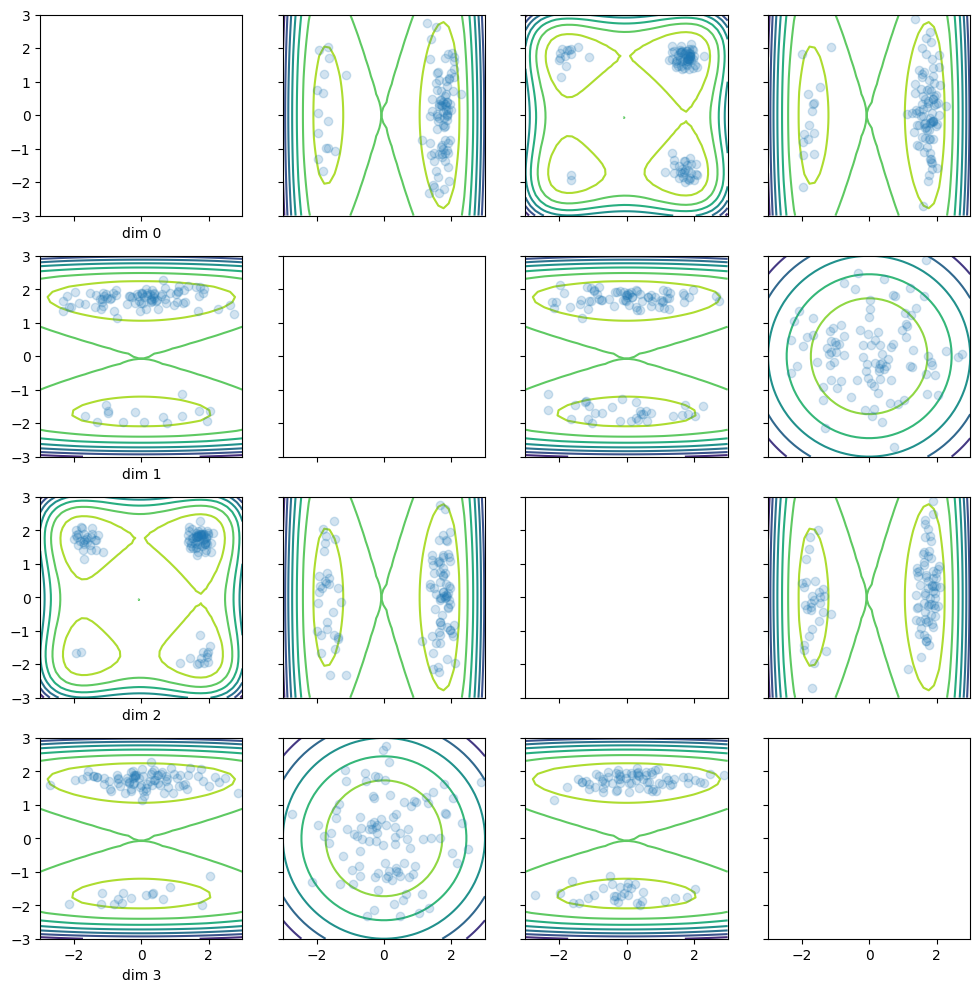

In [17]:
exp_config = get_experiment_config(0, "original")
results0 = run_experiment(exp_config)

In [ ]:
exp_config = get_experiment_config(1, "original")
results1 = run_experiment(exp_config)

In [ ]:
exp_config = get_experiment_config(2, "original")
results2 = run_experiment(exp_config)

# Train for longer

In [ ]:
exp_config = get_experiment_config(0, "original", long=True)
results0 = run_experiment(exp_config)

experiment using 11000.0 target evaluations


  0%|                                                                                                                                                                  | 2/50000 [00:00<2:30:00,  5.56it/s]

effective sample size of 0.300076425075531
Step 0: Free energy -156.95748901367188 Log Normalizer estimate 162.58963012695312


 17%|██████████████████████████▌                                                                                                                                    | 8335/50000 [23:49<1:59:01,  5.83it/s]

effective sample size of 0.9999998807907104
Step 8333: Free energy -164.37982177734375 Log Normalizer estimate 164.80203247070312


 33%|████████████████████████████████████████████████████▋                                                                                                         | 16668/50000 [47:38<1:36:38,  5.75it/s]

effective sample size of 0.9999998807907104
Step 16666: Free energy -164.279296875 Log Normalizer estimate 164.70811462402344


 50%|██████████████████████████████████████████████████████████████████████████████                                                                              | 25001/50000 [1:11:28<1:14:56,  5.56it/s]

effective sample size of 0.38250163197517395
Step 24999: Free energy -164.3887939453125 Log Normalizer estimate 164.71640014648438


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 33334/50000 [1:35:17<47:36,  5.83it/s]

effective sample size of 0.3873860538005829
Step 33332: Free energy -164.29666137695312 Log Normalizer estimate 164.6908721923828


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 33511/50000 [1:35:47<46:59,  5.85it/s]

In [ ]:
exp_config = get_experiment_config(1, "original", long=True)
results1 = run_experiment(exp_config)

In [ ]:
exp_config = get_experiment_config(2, "original", long=True)
results2 = run_experiment(exp_config)

# Train using FAB config

In [ ]:
exp_config = get_experiment_config(0, "custom")
results0 = run_experiment(exp_config)

training for 244140 iterations
experiment using 12499.968 target evaluations


  0%|                                                                                                                                                                | 4/244140 [00:01<13:35:45,  4.99it/s]

effective sample size of 0.34112319350242615
Step 0: Free energy -147.48159790039062 Log Normalizer estimate 161.5111083984375


  1%|█▏                                                                                                                                                            | 1917/244140 [01:00<2:06:25, 31.93it/s]

In [ ]:
exp_config = get_experiment_config(1, "custom")
results1 = run_experiment(exp_config)

In [ ]:
exp_config = get_experiment_config(2, "custom")
results2 = run_experiment(exp_config)

# Evaluation

In [ ]:
# jax.config.update("jax_enable_x64", True)

In [30]:
from evaluation import evaluate_many_well, load_checkpoint, make_forward_pass_func, \
    make_get_ess, make_get_resample_info, get_flow_init_params
import scipy

In [23]:
target_density = ManyWell(exp_config.final_config.density, (32,))

In [24]:
eval_batch_size = 1000

In [25]:
def evaluate_Z_estimation(seed, experiment_type = "original", long=False, 
                          eval_batch_size=1000, n_eval=50, flow_identity=False):
    exp_config = get_experiment_config(seed, experiment_type, long)
    if flow_identity:
        transition_params = get_flow_init_params(exp_config)
    else:
        transition_params = load_checkpoint(exp_config.params_filename)
    forward_pass_function = make_forward_pass_func(exp_config, transition_params=transition_params,
                                                  eval_batch_size=eval_batch_size)
    key = jax.random.PRNGKey(0)
    abs_errors = []
    for i in range(n_eval):
        key, subkey = jax.random.split(key)
        particle_state = forward_pass_function(subkey)
        log_Z_estimate = particle_state.log_normalizer_estimate
        relative_error = jnp.exp(log_Z_estimate - target_density.log_Z) - 1
        abs_error = jnp.abs(relative_error)
        abs_errors.append(abs_error)
    return jnp.stack(abs_errors)

#### Original

In [ ]:
# standard
abs_errors0 = evaluate_Z_estimation(0, "original", False)
jnp.mean(abs_errors0)

In [ ]:
# standard
abs_errors1 = evaluate_Z_estimation(1, "original", False)
jnp.mean(abs_errors1)

In [ ]:
abs_errors2 = evaluate_Z_estimation(2, "original", False)
jnp.mean(abs_errors2)

#### Original Long

In [36]:
exp_config = get_experiment_config(0, 'original', True)
transition_params = load_checkpoint(exp_config.params_filename)
particle_state = make_forward_pass_func(exp_config, 
                                 transition_params=transition_params,
                                                  eval_batch_size=eval_batch_size)(jax.random.PRNGKey(0))

import numpy as numpy
samples = np.array(particle_state.samples)
np.save("craft_original_config_samples.npy", samples)

experiment using 11000.0 target evaluations


In [31]:
abs_errors0 = evaluate_Z_estimation(0, "original", True)
jnp.mean(abs_errors0)

experiment using 11000.0 target evaluations


Array(0.02896835, dtype=float32)

In [27]:
abs_errors1 = evaluate_Z_estimation(1, "original", True)
jnp.mean(abs_errors1)

experiment using 11000.0 target evaluations


Array(0.02875625, dtype=float32)

In [28]:
abs_errors2 = evaluate_Z_estimation(2, "original", True)
jnp.mean(abs_errors2)

experiment using 11000.0 target evaluations


Array(0.03089078, dtype=float32)

In [34]:
vals = [float(jnp.mean(abs_errors0)), float(jnp.mean(abs_errors1)), jnp.mean(abs_errors2)]
sum(vals) / 3, scipy.stats.sem(vals, ddof=0) 

(Array(0.02953846, dtype=float32), 0.0005543415044087133)

#### Custom

In [14]:
abs_errors_custom0 = evaluate_Z_estimation(0, "custom", False)
jnp.mean(abs_errors_custom0 )

training for 244140 iterations
experiment using 12499.968 target evaluations


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint_custom_LFalse_seed0'

# old

In [ ]:
abs_errors_long = evaluate_Z_estimation(0, "custom", False)

In [ ]:
jnp.mean(abs_errors_long)

In [ ]:
jnp.mean(abs_errors_long)

In [ ]:
abs_errors0 = evaluate_Z_estimation(0)

In [ ]:
abs_errors1 = evaluate_Z_estimation(1)

In [ ]:
abs_errors2 = evaluate_Z_estimation(2)

In [ ]:
jnp.mean(abs_errors0), jnp.mean(abs_errors1), jnp.mean(abs_errors2)

In [ ]:
abs_errors0

### Evalation of full craft